In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from markowitz.data import ingest, preprocess
from markowitz.simulate import scenarios, portfolio_return
from markowitz.optimize import perform_opt
from funds import exp_ratio

### Download the ticker data

In [2]:
sd = "2016-01-01"
ed = pd.to_datetime('now').floor('d').strftime('%Y-%m-%d')
tickers = exp_ratio.keys()

data = ingest(tickers, sd, ed)
df = preprocess(data, tickers)

[*********************100%***********************]  208 of 208 completed


In [3]:
print(df.shape)
display(df.head(3))

(1330, 417)


,Date,SVSPX,ESGIX,DSCIX,BSPSX,USSPX,VCAIX,VCITX,VCORX,VGENX,...,FISVX-ret,FNDSX-ret,FTIHX-ret,FSKAX-ret,FXNAX-ret,FITLX-ret,FZIPX-ret,FZILX-ret,FNILX-ret,FZROX-ret
0,2016-01-04,187.440002,NaN,9.22,240.740005,28.740000,11.87,12.24,NaN,40.970001,...,NaN,NaN,NaN,1.001732,0.999131,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,187.800003,NaN,9.23,241.210007,28.799999,11.89,12.26,NaN,40.930000,...,NaN,NaN,NaN,0.986690,1.003478,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,185.399994,NaN,9.13,238.149994,28.430000,11.93,12.30,NaN,39.299999,...,NaN,NaN,NaN,0.975648,1.000867,NaN,NaN,NaN,NaN,NaN


In [4]:
for c in df.columns:
    if df[c].isnull().sum() == 0:
        print(c, 'all_good')
    else:
        print(c, 'missing_data. deleting the column')
        df = df.drop(columns=c)

Date all_good
SVSPX all_good
ESGIX missing_data. deleting the column
DSCIX all_good
BSPSX all_good
USSPX all_good
VCAIX all_good
VCITX all_good
VCORX missing_data. deleting the column
VGENX all_good
VEIPX all_good
VMVFX all_good
VFIIX all_good
VQNPX all_good
VGHCX all_good
VHYAX missing_data. deleting the column
VWEHX all_good
VWAHX all_good
VIPSX all_good
VFICX all_good
VWITX all_good
VFITX all_good
VMLTX all_good
VWESX all_good
VWLTX all_good
VUSTX all_good
VNJTX all_good
VNYTX all_good
VPAIX all_good
VSGBX all_good
VFSTX all_good
VWSTX all_good
VFISX all_good
VUBFX all_good
VWUSX all_good
VWINX all_good
VWNDX all_good
VWNFX all_good
DBIRX all_good
DSPIX all_good
BRLIX all_good
GEQZX all_good
NOBOX all_good
NOEMX all_good
NSRIX all_good
NOINX all_good
NOMIX all_good
NSIDX all_good
NOSIX all_good
NTAUX all_good
NUSFX all_good
BTIAX all_good
PSIFX all_good
PIASX all_good
SNXFX all_good
SFENX all_good
SFREX all_good
SFNNX all_good
SFILX all_good
SFLNX all_good
SFSNX all_good
SWISX all_g

FSKAX-ret all_good
FXNAX-ret all_good
FITLX-ret missing_data. deleting the column
FZIPX-ret missing_data. deleting the column
FZILX-ret missing_data. deleting the column
FNILX-ret missing_data. deleting the column
FZROX-ret missing_data. deleting the column


### Simulate and visualize

In [6]:
# 1-year returns for each vehicle across multiple scenarios
# each row is a scenario
rdf = scenarios(df, tickers, ndays=180, nscenarios=600)
print(rdf.shape)
rdf.head()

(600, 172)


,SVSPX,DSCIX,BSPSX,USSPX,VCAIX,VCITX,VGENX,VEIPX,VMVFX,VFIIX,...,FLCEX,FLGEX,FLVEX,FSMDX,FCHPX,FNCMX,FSRNX,FSSNX,FSKAX,FXNAX
0,0.001267,0.001566,0.001192,0.001029,0.000619,0.000846,0.001327,0.000744,0.000647,0.000039,...,0.001283,0.001510,0.001259,0.001779,0.000432,0.001553,0.002022,0.001876,0.001478,0.000163
1,-0.000984,0.000360,0.000200,0.000241,-0.000171,-0.000299,-0.000260,0.000459,-0.000063,-0.000121,...,0.000268,0.000102,0.000116,0.000024,-0.000139,0.000336,-0.000469,0.000164,0.000194,-0.000173
2,0.002065,0.000435,0.001997,0.002186,-0.000257,-0.000345,0.001562,0.000916,0.000409,-0.000051,...,0.002101,0.002689,0.001426,0.001469,-0.000096,0.002631,-0.000104,0.001277,0.002005,-0.000075
3,-0.002181,-0.001392,-0.000781,-0.000707,-0.000012,-0.000134,-0.001872,-0.001204,-0.000715,0.000091,...,-0.000665,-0.000252,-0.001021,-0.001071,0.000003,-0.000054,-0.001401,-0.000698,-0.000847,0.000060
4,0.000773,0.000244,0.001471,0.001441,0.000015,0.000052,0.000743,0.000847,0.000515,0.000121,...,0.001519,0.001923,0.001049,0.001142,0.000031,0.001727,-0.000253,0.000547,0.001439,0.000056


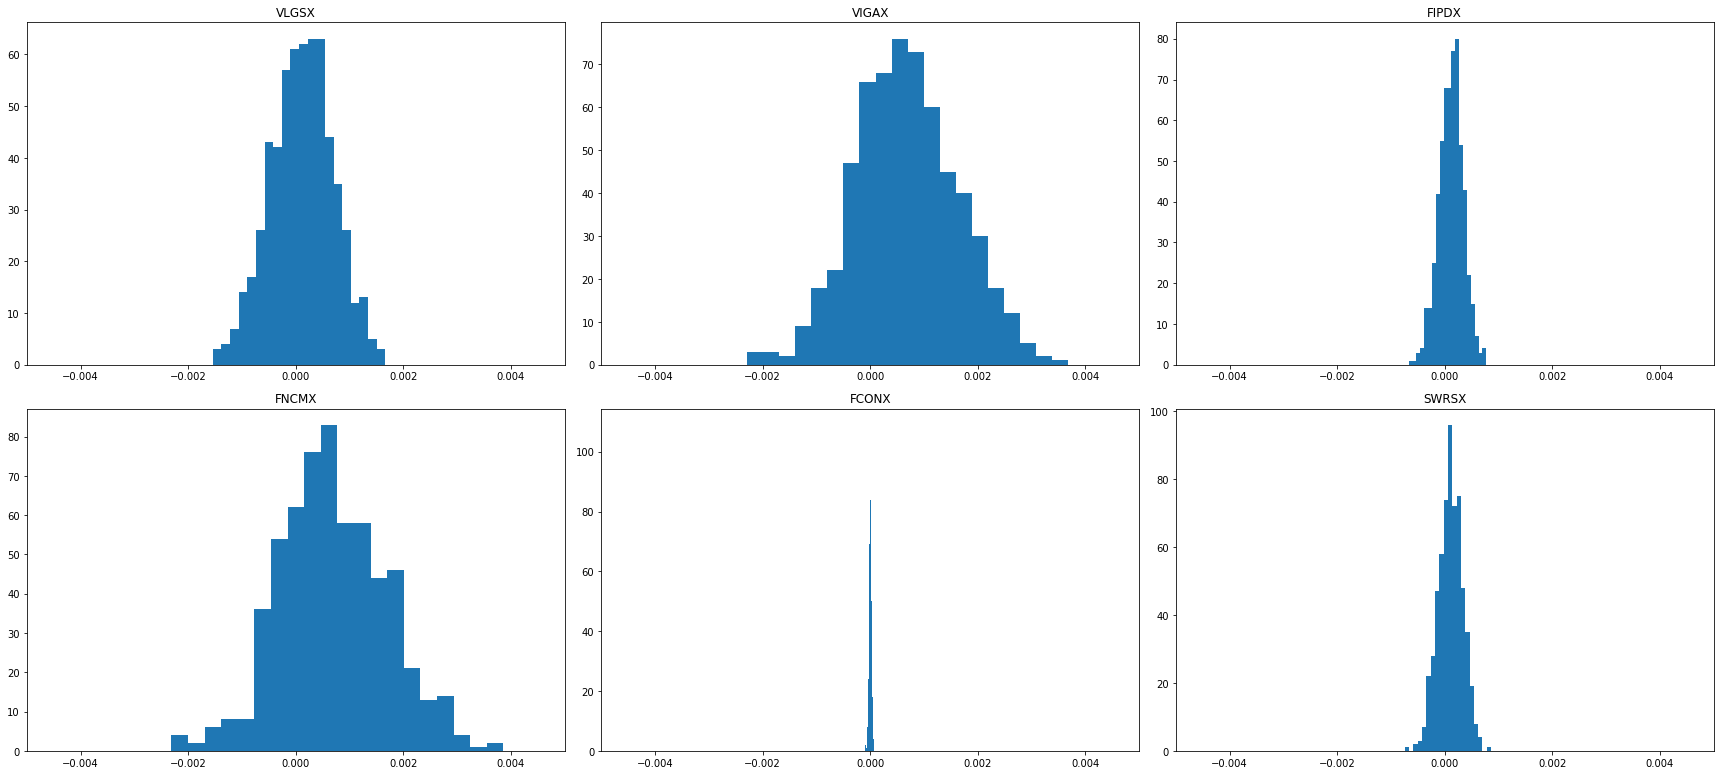

In [7]:
assets = ["VLGSX","VIGAX","FIPDX","FNCMX","FCONX","SWRSX"]

fig = plt.figure(figsize=(24, 16))
ctr = 0
for i in range(len(assets)):
    plt.subplot(3,3,i+1)
    plt.hist(rdf[assets[i]], bins=20)
    plt.xlim([-0.005,0.005])
    plt.title(assets[i])

plt.tight_layout()
plt.show()

### Optimize

In [5]:
for ndays in [15,30,60,90,180,270,360]:
    rdf = scenarios(df, tickers, ndays, nscenarios=600)
    resdf = perform_opt(rdf, exp_ratio, min_ratio=0.4)
    print('\n'+str(ndays))
    display(resdf)

/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



15


,NUSFX,BTIAX,PIASX,SWRSX,TINRX,VDADX,VIGAX,VLCAX,VLGSX,VTTSX,VTABX,FCONX,FCHPX,FNCMX,return,risk
0,0.000000,0.000000,0.000000,0.614647,0.00,0.013299,0.361306,0.000000,0.010748,0.00,0.000000,0.000000,0.00,0.000000,0.028581,0.000364
1,0.000000,0.000000,0.000000,0.686864,0.00,0.015576,0.297560,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.025425,0.000315
2,0.000000,0.000000,0.000000,0.596102,0.00,0.024502,0.234949,0.000000,0.000000,0.00,0.144447,0.000000,0.00,0.000000,0.021859,0.000265
3,0.000000,0.306058,0.000000,0.376899,0.01,0.034042,0.162423,0.000000,0.000000,0.01,0.000000,0.080577,0.01,0.010000,0.017918,0.000214
4,0.000000,0.306876,0.000000,0.253518,0.00,0.000000,0.000000,0.087937,0.000000,0.01,0.000000,0.255995,0.01,0.075673,0.013189,0.000162
5,0.254119,0.098905,0.257804,0.170763,0.01,0.026671,0.079746,0.000000,0.000000,0.00,0.091991,0.010000,0.00,0.000000,0.009787,0.000109
6,0.000000,0.089735,0.000000,0.086736,0.00,0.000000,0.053549,0.000000,0.000000,0.00,0.000000,0.769979,0.00,0.000000,0.004889,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



30


,BTIAX,SWRSX,VDADX,VIGAX,VLGSX,VTAPX,FCONX,FIPDX,FCHPX,FNCMX,return,risk
0,0.010000,0.000000,0.000000,0.648438,0.331562,0.000000,0.000000,0.000000,0.01,0.00,0.043840,0.000364
1,0.000000,0.216282,0.000000,0.558161,0.100868,0.000000,0.000000,0.124689,0.00,0.00,0.039838,0.000315
2,0.000000,0.284182,0.000000,0.464116,0.045639,0.000000,0.000000,0.206062,0.00,0.00,0.034910,0.000265
3,0.000000,0.244071,0.000000,0.361051,0.000000,0.000000,0.000000,0.394878,0.00,0.00,0.029432,0.000214
4,0.071676,0.235947,0.060272,0.204922,0.000000,0.101073,0.000000,0.316110,0.00,0.01,0.022722,0.000162
5,0.037033,0.155312,0.042974,0.128785,0.000000,0.137682,0.273993,0.214222,0.00,0.01,0.015382,0.000109
6,0.000000,0.180987,0.000000,0.084539,0.010000,0.000000,0.724474,0.000000,0.00,0.00,0.007600,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



60


,VUBFX,SWRSX,VIGAX,VLGSX,VTAPX,VTABX,FIPDX,FCHPX,FNCMX,return,risk
0,0.000000,0.000000,0.990000,0.010000,0.000000,0.000000,0.000000,0.00,0.00,0.064521,0.000362
1,0.000000,0.000000,0.899061,0.100939,0.000000,0.000000,0.000000,0.00,0.00,0.059589,0.000315
2,0.000000,0.000000,0.794147,0.205853,0.000000,0.000000,0.000000,0.00,0.00,0.053900,0.000265
3,0.000000,0.000000,0.666984,0.333016,0.000000,0.000000,0.000000,0.00,0.00,0.047005,0.000214
4,0.000000,0.000000,0.504659,0.277232,0.000000,0.000000,0.218109,0.00,0.00,0.038289,0.000162
5,0.000000,0.084115,0.318205,0.086046,0.000000,0.108606,0.403029,0.00,0.00,0.027743,0.000109
6,0.297313,0.039878,0.138901,0.020747,0.090928,0.158658,0.233575,0.01,0.01,0.014749,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



90


,VIGAX,VLGSX,FCONX,FIPDX,FNCMX,return,risk
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.066647,0.000276
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.066647,0.000276
2,0.972472,0.027528,0.000000,0.000000,0.000000,0.065043,0.000265
3,0.840999,0.159001,0.000000,0.000000,0.000000,0.057381,0.000214
4,0.690903,0.309097,0.000000,0.000000,0.000000,0.048633,0.000162
5,0.449477,0.180761,0.000000,0.326312,0.043450,0.037913,0.000109
6,0.000000,0.000000,0.122221,0.655652,0.222127,0.021948,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



180


,VIGAX,VLGSX,FIPDX,FNCMX,return,risk
0,0.000000,0.000000,0.000000,1.000000,0.069901,0.000129
1,0.000000,0.000000,0.000000,1.000000,0.069901,0.000129
2,0.000000,0.000000,0.000000,1.000000,0.069901,0.000129
3,0.000000,0.000000,0.000000,1.000000,0.069901,0.000129
4,0.000000,0.000000,0.000000,1.000000,0.069901,0.000129
5,0.000000,0.096809,0.000000,0.903191,0.064241,0.000109
6,0.084415,0.214128,0.222415,0.479042,0.044305,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



270


,VLGSX,FNCMX,return,risk
0,0.000000,1.000000,0.068694,0.000087
1,0.000000,1.000000,0.068694,0.000087
2,0.000000,1.000000,0.068694,0.000087
3,0.000000,1.000000,0.068694,0.000087
4,0.000000,1.000000,0.068694,0.000087
5,0.000000,1.000000,0.068694,0.000087
6,0.242597,0.757403,0.055286,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



360


,FNCMX,return,risk
0,1.0,0.074093,0.000049
1,1.0,0.074093,0.000049
2,1.0,0.074093,0.000049
3,1.0,0.074093,0.000049
4,1.0,0.074093,0.000049
5,1.0,0.074093,0.000049
6,1.0,0.074093,0.000049


In [8]:
w = {}
for k in exp_ratio.keys():
    w[k] = 0

w['FNCMX'] = 0.3
w['VIGAX'] = 0.3
w['VLGSX'] = 0.2
w['FIPDX'] = 0.1
w['SWRSX'] = 0.1

for ndays in [15,30,60,90,180,270,360]:
    rdf = scenarios(df, tickers, ndays, nscenarios=600)
    pdf, perc_neg_scenarios, avg_neg_return, avg_return = portfolio_return(rdf, w)
    print(ndays, perc_neg_scenarios, avg_neg_return, avg_return)

15 0.41 -0.0005649720703282984 0.0003846177354637521
30 0.375 -0.0003465410636066252 0.0004148903827247575
60 0.3283333333333333 -0.0001983523896904747 0.00043222068355820606
90 0.3 -0.00014132999993840943 0.00043698747402981205
180 0.21333333333333335 -5.9894222997076465e-05 0.0004588202818021238
270 0.155 -3.932091472577966e-05 0.0004571795684792168
360 0.11166666666666666 -2.1550895223868786e-05 0.000483071085767201
